<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/waveenergyconverters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

<class 'pandas.core.frame.DataFrame'>


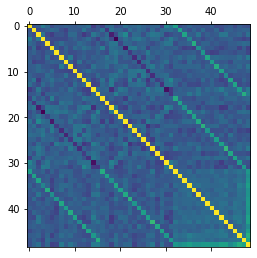

In [3]:
data_adelaide = pd.read_csv("Adelaide_Data.csv")
data_sydney = pd.read_csv("Sydney_Data.csv")
data_perth = pd.read_csv("Perth_Data.csv")
data_tasmania = pd.read_csv("Tasmania_Data.csv")

strOfNames = []

for i in range (16):
  strOfNames.append("X" + str(i+1))
for i in range (16):
  strOfNames.append("Y" + str(i+1))
for i in range (16):
  strOfNames.append("P" + str(i+1))
strOfNames.append("Total")

data_adelaide.columns = strOfNames

ycolumns = data_adelaide.iloc[:,16:48]

corr = data_adelaide.corr()
print(type(corr))

plt.matshow(corr)

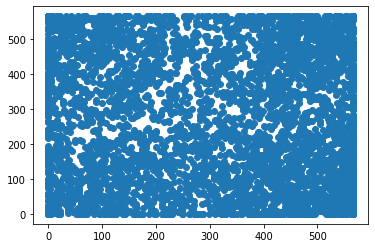

In [ ]:
plt.scatter(data_adelaide.iloc[:,0] , data_adelaide.iloc[:,16])

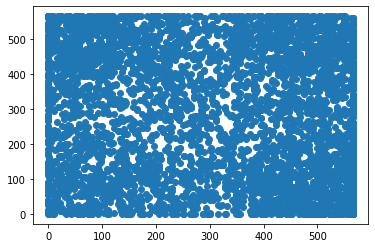

In [ ]:
plt.scatter(data_adelaide.iloc[:,1] , data_adelaide.iloc[:,17])

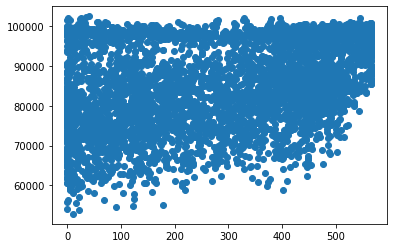

In [ ]:
plt.scatter(data_adelaide.iloc[:,0] , data_adelaide.iloc[:,32])

In [12]:
lista = []

for i in range(16):
  arg1, arg2 = "X" + str(i+1) , "Y" + str(i+1)
  lista.append(arg1)
  lista.append(arg2)


print(lista)

['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16']


In [29]:
x = data_adelaide[lista].values.reshape(-1, 1)[:1000]
y = data_adelaide["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
# f = plt.figure()
# f.set_figwidth(30)
# f.set_figheight(15)
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.plot(x, (x * model.coef_ + model.intercept_),"r")
# plt.scatter(x,y)
# print('Mean squared error equals:',mean_squared_error(y, (x*model.coef_+model.intercept_)))
# print(model.coef_)
# print(model.intercept_)

y_pred = model.predict(X_test)

print("\nŚredni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))


Średni procent błędu:
2.2384952560524716 %
31564.423444660533


In [64]:



xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 1000, alpha = 1000, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)
# print(str((rmse/np.mean(y))*100)+" %")
# print("RMSE: %f" % (rmse))

[14:25:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
43989.45421327702
